In [215]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pingouin import corr
from sklearn.metrics import mean_squared_error
from pandas.plotting import autocorrelation_plot
from math import sqrt



In [216]:
df = pd.read_csv("BTC-USD.csv")
arimadt = pd.read_csv("BTC-USD.csv")
dfMes=df
df[["Close"]]


,Close
0,383.614990
1,375.071991
2,359.511993
3,328.865997
4,320.510010
...,...
2282,28840.953125
2283,29001.720703
2284,29374.152344
2285,32127.267578


In [217]:
dfMes['month']=pd.to_datetime(dfMes['Date']).dt.month
dfMes['year']=pd.to_datetime(dfMes['Date']).dt.year
dfMes

,Date,Open,High,Low,Close,Adj Close,Volume,month,year
0,2014-10-01,387.427002,391.378998,380.779999,383.614990,383.614990,26229400,10,2014
1,2014-10-02,383.988007,385.497009,372.946014,375.071991,375.071991,21777700,10,2014
2,2014-10-03,375.181000,377.695007,357.859009,359.511993,359.511993,30901200,10,2014
3,2014-10-04,359.891998,364.487000,325.885986,328.865997,328.865997,47236500,10,2014
4,2014-10-05,328.915985,341.800995,289.295990,320.510010,320.510010,83308096,10,2014
...,...,...,...,...,...,...,...,...,...
2282,2020-12-30,27360.089844,28937.740234,27360.089844,28840.953125,28840.953125,51287442704,12,2020
2283,2020-12-31,28841.574219,29244.876953,28201.992188,29001.720703,29001.720703,46754964848,12,2020
2284,2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359,1,2021
2285,2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765,1,2021


In [218]:
dfMes.Close

0         383.614990
1         375.071991
2         359.511993
3         328.865997
4         320.510010
            ...     
2282    28840.953125
2283    29001.720703
2284    29374.152344
2285    32127.267578
2286    32782.023438
Name: Close, Length: 2287, dtype: float64

In [219]:
def RetornarMedia(velor):
    resultado=0.0
    for i in range( len(velor)):
        resultado+=velor[i];


    return resultado/i


def FazerMatematia(df, w):
    x = 0
    velor = []
    resultado =[]
    for ind in range(2286-1):
        if w == 1:
            if df['month'].loc[ind] == df['month'].loc[ind+1]:
                velor.append(df['Close'].loc[ind])
            else:
                resultado.append(RetornarMedia(velor))    
                velor.clear()
        else:
            if df['year'].loc[ind] == df['year'].loc[ind+1]:
                velor.append(df['Close'].loc[ind])
            else:
                resultado.append(RetornarMedia(velor))    
                velor.clear()
                      
    return resultado


In [220]:
df.Close.rolling(3).sum()

retornar =FazerMatematia(df,2)
dt = pd.DataFrame()
dt['Close']=retornar
dt


,Close
0,361.452444
1,272.768366
2,568.968346
3,3989.107091
4,7603.709132
5,7416.174363
6,11097.782036


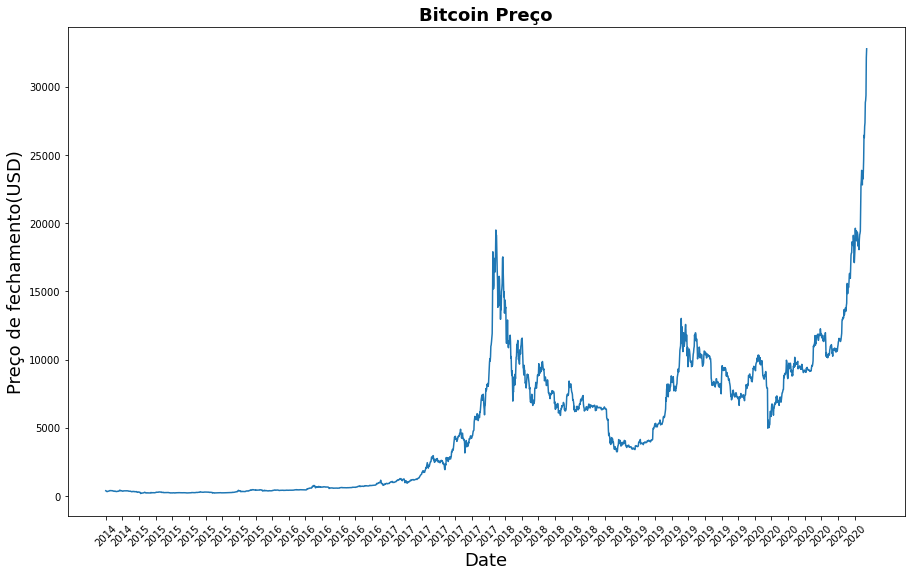

In [221]:
preco=df[["Close"]]
#preco=retornar
plt.figure(figsize=(15,9))
plt.plot(preco)
plt.xticks(range(0,df.shape[0],50),df["year"].loc[::50],rotation=45)
plt.title("Bitcoin Preço",fontsize =18, fontweight='bold')
plt.xlabel('Date',fontsize =18)
plt.ylabel('Preço de fechamento(USD)',fontsize =18)
plt.show()

In [222]:
retornarYY =FazerMatematia(df,1)
dtYY = pd.DataFrame()
dtYY['Close']=retornarYY


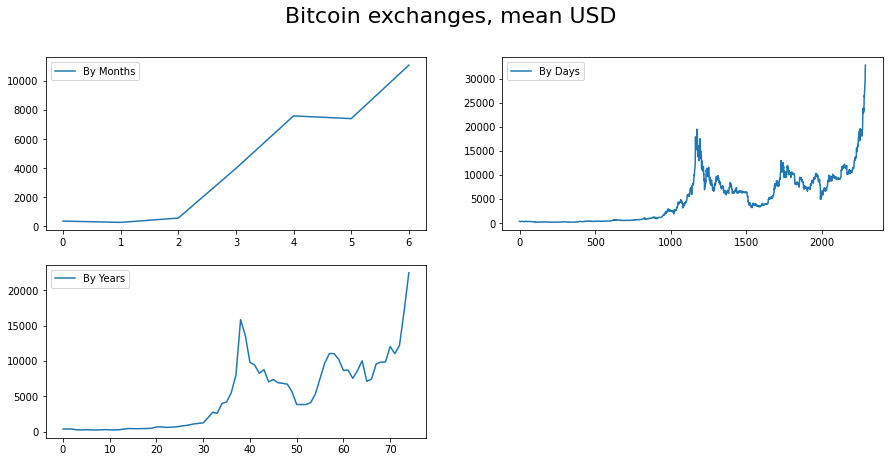

In [223]:
fig = plt.figure(figsize=[15, 7])
plt.suptitle('Bitcoin exchanges, mean USD', fontsize=22)
plt.subplot(221)
plt.plot(dt.Close, '-', label='By Months')
plt.legend()

plt.subplot(222)
plt.plot(df.Close, '-', label='By Days')
plt.legend()

plt.subplot(223)
plt.plot(dtYY.Close, '-', label='By Years')
plt.legend()

plt.show()

In [224]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.layers import Dense, LSTM, Dropout,Flatten
from tensorflow.keras import Sequential

In [225]:
price =df.Close

X = price
size = int(len(X) * 0.7)
train_df, test_df = X[0:size], X[size:len(X)]
training_values = train_df.values
training_values = np.reshape(training_values, (len(training_values), 1))

In [226]:
scaler = MinMaxScaler()
training_values = scaler.fit_transform(training_values)

In [227]:
print(f'Antes:{preco.values[0]}, Normalizado:{training_values [0]}')
print(f'Antes:{preco.values[500]}, Normalizado:{training_values [500]}')
print(f'Antes:{preco.values[900]}, Normalizado:{training_values [900]}')

Antes:[383.61499], Normalizado:[0.01063765]
Antes:[391.859985], Normalizado:[0.01106443]
Antes:[1036.73999], Normalizado:[0.04444452]


In [228]:


x_train = training_values[0: len(training_values)-1]
y_train = training_values[1: len(training_values)]
x_train = np.reshape(x_train, (len(x_train), 1, 1))
model = Sequential()

In [229]:
import csv 
f = open('Treinamento.csv', 'w', newline='', encoding='utf-8')
w = csv.writer(f)
w.writerow(x_train)
f.close()

In [230]:
model = Sequential()
model.add(LSTM(10,input_shape = (None,1), activation="relu", return_sequences=True))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")
model.fit(x_train,y_train,epochs=53,batch_size=33)

Epoch 1/53
49/49 [==============================] - 1s 1ms/step - loss: 0.0466
Epoch 2/53
49/49 [==============================] - 0s 1ms/step - loss: 0.0326
Epoch 3/53
49/49 [==============================] - 0s 1ms/step - loss: 0.0268
Epoch 4/53
49/49 [==============================] - 0s 1ms/step - loss: 0.0234
Epoch 5/53
49/49 [==============================] - 0s 1ms/step - loss: 0.0202
Epoch 6/53
49/49 [==============================] - 0s 1ms/step - loss: 0.0166
Epoch 7/53
49/49 [==============================] - 0s 1ms/step - loss: 0.0129
Epoch 8/53
49/49 [==============================] - 0s 1ms/step - loss: 0.0094
Epoch 9/53
49/49 [==============================] - 0s 1ms/step - loss: 0.0062
Epoch 10/53
49/49 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 11/53
49/49 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 12/53
49/49 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 13/53
49/49 [==============================

In [231]:
test_values = test_df.values
test_values = np.reshape(test_values, (len(test_values), 1))
test_values = scaler.transform(test_values)
test_values = np.reshape(test_values, (len(test_values), 1, 1))
predicted_price = model.predict(test_values)
predicted_price = np.reshape(predicted_price, (len(predicted_price), 1))
predicted_price = scaler.inverse_transform(predicted_price)
t = open('Test.csv', 'w', newline='', encoding='utf-8')
x = csv.writer(t)
x.writerow(predicted_price)

22/22 [==============================] - 0s 714us/step


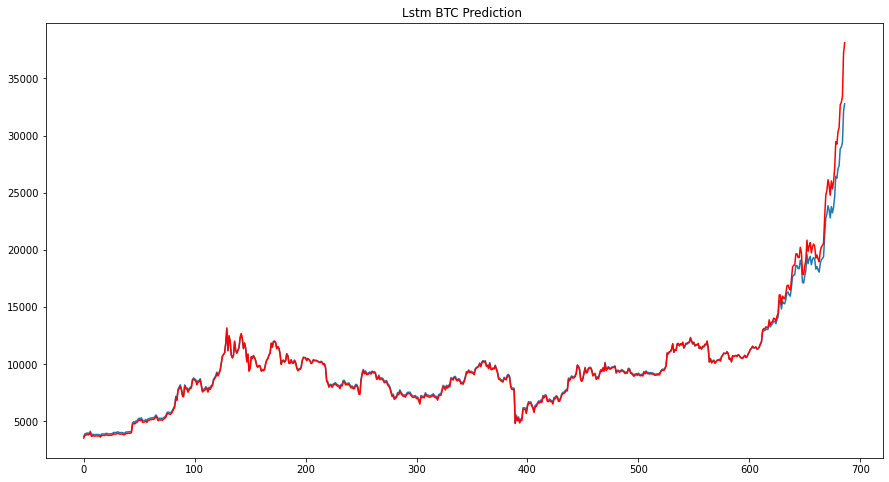

In [232]:
plt.figure(figsize=(15,8))
ax = plt.gca()  
plt.plot(test_df.values,  label = 'Real Price')
plt.plot(predicted_price, color = 'red', label = 'Predicted Price')
plt.title('Lstm BTC Prediction ')
test_df = test_df.reset_index()
x= test_df.index
plt.show()

In [233]:
#df['original']=original
#df['prediction']=prediction
#cof = df[['original','prediction']].dropna()
#cof.corr()
rmseLsm =  np.sqrt(mean_squared_error(test_df.Close.values, predicted_price))
rmseLsm

573.739237853571

In [234]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

price = df.Close

X = price.values
size = int(len(X) * 0.7)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

predicted=3631.728314, expected=3673.836182
predicted=3677.797192, expected=3915.714355
predicted=3932.599626, expected=3947.094482
predicted=3939.960836, expected=3999.820557
predicted=3998.342791, expected=3954.118164
predicted=3934.105774, expected=4005.526611
predicted=4008.892776, expected=4142.526855
predicted=4148.555085, expected=3810.427490
predicted=3782.156424, expected=3882.696289
predicted=3896.106823, expected=3854.357910
predicted=3843.959766, expected=3851.047363
predicted=3870.954559, expected=3854.785400
predicted=3851.122988, expected=3859.583740
predicted=3861.523068, expected=3864.415039
predicted=3864.783143, expected=3847.175781
predicted=3845.419377, expected=3761.557129
predicted=3755.265436, expected=3896.375000
predicted=3909.638577, expected=3903.942627
predicted=3901.370527, expected=3911.484375
predicted=3915.848255, expected=3901.131592
predicted=3892.024031, expected=3963.313721
predicted=3967.955630, expected=3951.599854
predicted=3948.110649, expected=

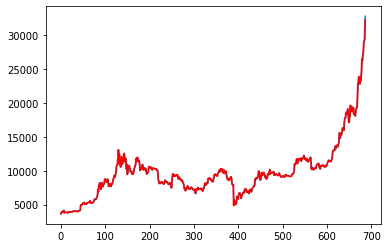

In [235]:

for t in range(len(test)):
	model = sm.tsa.ARIMA(history, order=(4,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

Test RMSE: 395.579


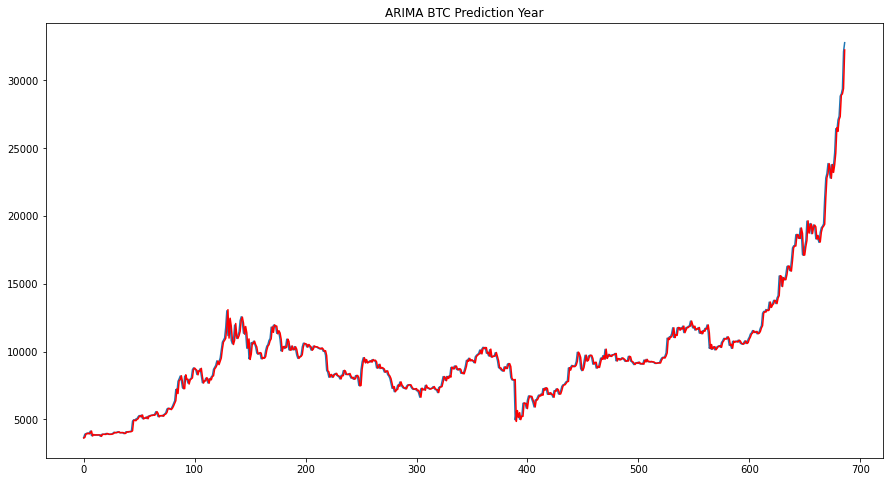

In [236]:



plt.figure(figsize=(15,8))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
ax = plt.gca()  
plt.plot(test[-700:],  label = 'Real Price')
plt.plot(predictions[-700:], color = 'red', label = 'Predicted Price')
plt.title('ARIMA BTC Prediction Year')
test_df = test_df.reset_index()
x= test_df.index
plt.show()

In [237]:
resultados = pd.DataFrame()
resultados['original']=predictions
resultados['prediction']=test
cofArrr = resultados[['original','prediction']].dropna()
cofArrr.corr()

,original,prediction
original,1.00000,0.99558
prediction,0.99558,1.00000
